Primeiro eu pegar a palavra e tirar todos os caracteres que não são úteis

In [1]:
punctuation_chars = ["'", '"', ",", ".", "!", ":", ";", '#', '@']
def strip_punctuation(word):
    for letter in word:
        if letter in punctuation_chars:
            word = word.replace(letter,'')
    return word

Depois vou pegar dentro do arquivo chamado 'positive_words.txt' palavras que são positivas em inglês,dados tirados do:
          Bing Liu. "Sentiment Analysis and Subjectivity." An chapter in
          Handbook of Natural Language Processing, Second Edition,
          (editors: N. Indurkhya and F. J. Damerau), 2010.

In [2]:
positive_words = []
with open("positive_words.txt") as pos_f:
    for lin in pos_f:
        if lin[0] != ';' and lin[0] != '\n':
            positive_words.append(lin.strip())

com a função get_pos() vou devolver a quantidade de palavras positivas ,dentro do tweet, e usando dentro dela a função strip_punctuation() para limpar os caractéres não úteis

In [3]:
def get_pos(strin):
    words = strin.split()
    occurance = 0
    for word in words:
        if strip_punctuation(word).lower() in positive_words:
            occurance+=1
    return occurance

Vou pegar dentro do arquivo chamado 'negative_words.txt' palavras que são negativas em inglês

In [4]:
negative_words = []
with open("negative_words.txt") as pos_f:
    for lin in pos_f:
        if lin[0] != ';' and lin[0] != '\n':
            negative_words.append(lin.strip())

Mesma coisa que a função get_pos() só que dessa vez vou pegar as palavras negativas

In [5]:
def get_neg(strin):
    occurance = 0
    words  = strin.split()
    for word in words:
        if strip_punctuation(word).lower() in negative_words:
            occurance +=1
    return occurance

Dentro do arquivo 'project_twitter_data.csv' há uma série de tweets, quantidade de republicação e retweets, a tarefa é coletar e criar um arquivo csv com cada um desses dados.  

In [6]:
with open('project_twitter_data.csv','r') as file:
    tweets = file.readlines()
    reply = []
    retweet = []
    negative_worlds = []
    positive_worlds = []
    for tweet in tweets[1:]:
        reply.append(tweet.split(',')[2].replace('\n',''))
        retweet.append(int(tweet.split(',')[1].replace('\n','')))
        negative_worlds.append(get_neg(tweet.split(',')[0]))
        positive_worlds.append(get_pos(tweet.split(',')[0]))
    print(negative_worlds)
    print(positive_worlds)
    print(reply)
    print(retweet)

[2, 0, 0, 0, 0, 0, 3, 2, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1]
[2, 1, 1, 2, 2, 2, 0, 0, 4, 0, 1, 2, 1, 1, 2, 3, 3, 1]
['0', '2', '1', '0', '5', '0', '0', '0', '2', '0', '0', '0', '1', '2', '0', '6', '0', '0']
[1, 1, 3, 6, 9, 19, 0, 0, 82, 0, 0, 47, 2, 0, 0, 4, 19, 0]


Por último cria-se um arquivo csv com o número de retweets, o número de replies,Pontos positivos, pontos negativos e uma pontuação verificando se é positiva ou não (pontos positivos -  pontos negativos)

In [7]:
with open('resulting_data.csv','w') as file:
    file.write('Number of Retweets, Number of Replies, Positive Score, Negative Score, Net Score\n')
    i = 0
    while i < len(reply):
        file.write(str(retweet[i])+','+reply[i]+','+str(positive_worlds[i])+','+str(negative_worlds[i])+','+str(positive_worlds[i]-negative_worlds[i])+'\n')
        i+=1

In [10]:
import matplotlib.pyplot as plt

In [13]:
net_Score = [i-j for i,j in zip(positive_worlds,negative_worlds)]

Importei o matplotlib para plotar os resultados em um grafico de pontos

Text(0, 0.5, 'Número de Retweets')

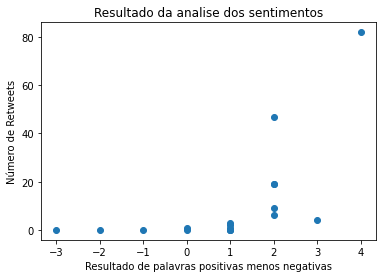

In [19]:
plt.scatter(net_Score,retweet)
plt.title('Resultado da analise dos sentimentos')
plt.xlabel('Resultado de palavras positivas menos negativas')
plt.ylabel('Número de Retweets')